# Proyek Analisis Data: E-Commerce Public Dataset
* Nama: Rizal Mujahiddan
* Email: rizal.mujahiddan@gmail.com
* Id Dicoding: rizal_mujahiddan69

## Menentukan Pertanyaan Bisnis

* Apa Kategori Produk yang paling laku terjual ?
* Customer Terbanyak Orderannya berasal dari daerah mana ?
* Penjual Terbanyak Orderannya berasal dari daerah mana ?

## Install Library

In [1]:
!pip install -q pandas_dq
!pip install -q hvplot
!pip install -q folium
!pip install -q jenkspy

## Menyiapkan semua library yang dibutuhkan

In [2]:
from IPython.display import display
from pandas_dq import dq_report


import matplotlib.pyplot as plt
import numpy as np # linear algebra
import os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import dask.dataframe as dd
import requests
import folium

## Data Wrangling

### Gathering Data

In [3]:
dir_fold = '/kaggle/input/e-commerce-public-dataset/E-Commerce Public Dataset'

seller_df = pd.read_csv(f'{dir_fold}/sellers_dataset.csv')
order_df  = pd.read_csv(f'{dir_fold}/orders_dataset.csv')
geolocate_df  = pd.read_csv(f'{dir_fold}/geolocation_dataset.csv')
cust_df = pd.read_csv(f'{dir_fold}/customers_dataset.csv')
order_item_df = pd.read_csv(f'{dir_fold}/order_items_dataset.csv')
order_review_df = pd.read_csv(f'{dir_fold}/order_reviews_dataset.csv')
prod_df = pd.read_csv(f'{dir_fold}/products_dataset.csv')
prod_cat_df = pd.read_csv(f'{dir_fold}/product_category_name_translation.csv')
order_pay_df = pd.read_csv(f'{dir_fold}/order_payments_dataset.csv')

print('seller_df')
display(seller_df)
print('geolocate_df')
display(geolocate_df)
print('cust_df')
display(cust_df)

seller_df


seller_id              seller_zip_code_prefix  \
0     3442f8959a84dea7ee197c632cb2df15           13023           
1     d1b65fc7debc3361ea86b5f14c68d2e2           13844           
2     ce3ad9de960102d0677a81f5d0bb7b2d           20031           
3     c0f3eea2e14555b6faeea3dd58c1b1c3            4195           
4     51a04a8a6bdcb23deccc82b0b80742cf           12914           
...                                ...                     ...   
3090  98dddbc4601dd4443ca174359b237166           87111           
3091  f8201cab383e484733266d1906e2fdfa           88137           
3092  74871d19219c7d518d0090283e03c137            4650           
3093  e603cf3fec55f8697c9059638d6c8eb5           96080           
3094  9e25199f6ef7e7c347120ff175652c3b           12051           

        seller_city     seller_state  
0              campinas      SP       
1            mogi guacu      SP       
2        rio de janeiro      RJ       
3             sao paulo      SP       
4     braganca paulista      SP       
...                 ...          ...  
3090            sarandi      PR       
3091            palhoca      SC       
3092          sao paulo      SP       
3093            pelotas      RS       
3094            taubate      SP       

[3095 rows x 4 columns]

geolocate_df


geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                    1037               -23.545621       -46.639292      
1                    1046               -23.546081       -46.644820      
2                    1046               -23.546129       -46.642951      
3                    1041               -23.544392       -46.639499      
4                    1035               -23.541578       -46.641607      
...                              ...              ...              ...   
1000158             99950               -28.068639       -52.010705      
1000159             99900               -27.877125       -52.224882      
1000160             99950               -28.071855       -52.014716      
1000161             99980               -28.388932       -51.846871      
1000162             99950               -28.070104       -52.018658      

        geolocation_city geolocation_state  
0              sao paulo         SP         
1              sao paulo         SP         
2              sao paulo         SP         
3              sao paulo         SP         
4              sao paulo         SP         
...                  ...               ...  
1000158         tapejara         RS         
1000159   getulio vargas         RS         
1000160         tapejara         RS         
1000161  david canabarro         RS         
1000162         tapejara         RS         

[1000163 rows x 5 columns]

cust_df


customer_id                    customer_unique_id         \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

       customer_zip_code_prefix     customer_city      customer_state  
0                14409                          franca       SP        
1                 9790           sao bernardo do campo       SP        
2                 1151                       sao paulo       SP        
3                 8775                 mogi das cruzes       SP        
4                13056                        campinas       SP        
...                         ...                    ...            ...  
99436             3937                       sao paulo       SP        
99437             6764                 taboao da serra       SP        
99438            60115                       fortaleza       CE        
99439            92120                          canoas       RS        
99440             6703                           cotia       SP        

[99441 rows x 5 columns]

In [4]:
print('prod_df')
display(prod_df)
print('prod_cat_df')
display(prod_cat_df)

prod_df


product_id                  product_category_name         \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0             40.0                     287.0                    1.0          
1             44.0                     276.0                    1.0          
2             46.0                     250.0                    1.0          
3             27.0                     261.0                    1.0          
4             37.0                     402.0                    4.0          
...                    ...                         ...                 ...   
32946         45.0                      67.0                    2.0          
32947         41.0                     971.0                    1.0          
32948         50.0                     799.0                    1.0          
32949         60.0                     156.0                    2.0          
32950         58.0                     309.0                    1.0          

       product_weight_g  product_length_cm  product_height_cm  \
0             225.0            16.0               10.0          
1            1000.0            30.0               18.0          
2             154.0            18.0                9.0          
3             371.0            26.0                4.0          
4             625.0            20.0               17.0          
...                 ...                ...                ...   
32946       12300.0            40.0               40.0          
32947        1700.0            16.0               19.0          
32948        1400.0            27.0                7.0          
32949         700.0            31.0               13.0          
32950        2083.0            12.0                2.0          

       product_width_cm  
0            14.0        
1            20.0        
2            15.0        
3            26.0        
4            13.0        
...                 ...  
32946        40.0        
32947        16.0        
32948        27.0        
32949        20.0        
32950         7.0        

[32951 rows x 9 columns]

prod_cat_df


product_category_name               \
0                                     beleza_saude   
1                           informatica_acessorios   
2                                       automotivo   
3                                  cama_mesa_banho   
4                                 moveis_decoracao   
5                                    esporte_lazer   
6                                       perfumaria   
7                            utilidades_domesticas   
8                                        telefonia   
9                               relogios_presentes   
10                               alimentos_bebidas   
11                                           bebes   
12                                       papelaria   
13                        tablets_impressao_imagem   
14                                      brinquedos   
15                                  telefonia_fixa   
16                              ferramentas_jardim   
17                     fashion_bolsas_e_acessorios   
18                                 eletroportateis   
19                                  consoles_games   
20                                           audio   
21                                fashion_calcados   
22                                      cool_stuff   
23                                malas_acessorios   
24                                    climatizacao   
25               construcao_ferramentas_construcao   
26  moveis_cozinha_area_de_servico_jantar_e_jardim   
27                   construcao_ferramentas_jardim   
28                         fashion_roupa_masculina   
29                                        pet_shop   
30                               moveis_escritorio   
31                                    market_place   
32                                     eletronicos   
33                                eletrodomesticos   
34                               artigos_de_festas   
35                                   casa_conforto   
36              construcao_ferramentas_ferramentas   
37                       agro_industria_e_comercio   
38                       moveis_colchao_e_estofado   
39                                 livros_tecnicos   
40                                 casa_construcao   
41                           instrumentos_musicais   
42                                     moveis_sala   
43               construcao_ferramentas_iluminacao   
44                   industria_comercio_e_negocios   
45                                       alimentos   
46                                           artes   
47                                   moveis_quarto   
48                          livros_interesse_geral   
49                construcao_ferramentas_seguranca   
50                  fashion_underwear_e_moda_praia   
51                                 fashion_esporte   
52                         sinalizacao_e_seguranca   
53                                             pcs   
54                                artigos_de_natal   
55                          fashion_roupa_feminina   
56                              eletrodomesticos_2   
57                               livros_importados   
58                                         bebidas   
59                                       cine_foto   
60                                      la_cuisine   
61                                          musica   
62                                 casa_conforto_2   
63                     portateis_casa_forno_e_cafe   
64                               cds_dvds_musicais   
65                                    dvds_blu_ray   
66                                          flores   
67                              artes_e_artesanato   
68                                 fraldas_higiene   
69                   fashion_roupa_infanto_juvenil   
70                              seguros_e_servicos   

        product_category_name_english        
0                             health_beauty  
1                     computers_acc

In [5]:
print('order_df')
display(order_df)
print('order_item_df')
display(order_item_df)
print('order_review_df')
display(order_review_df)
print('order_pay_df')
display(order_pay_df)

order_df


order_id                        customer_id             \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp  order_approved_at    \
0       delivered     2017-10-02 10:56:33    2017-10-02 11:07:15   
1       delivered     2018-07-24 20:41:37    2018-07-26 03:24:27   
2       delivered     2018-08-08 08:38:49    2018-08-08 08:55:23   
3       delivered     2017-11-18 19:28:06    2017-11-18 19:45:59   
4       delivered     2018-02-13 21:18:39    2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436   delivered     2017-03-09 09:54:05    2017-03-09 09:54:05   
99437   delivered     2018-02-06 12:58:58    2018-02-06 13:10:37   
99438   delivered     2017-08-27 14:46:43    2017-08-27 15:04:16   
99439   delivered     2018-01-08 21:28:27    2018-01-08 21:36:21   
99440   delivered     2018-03-08 20:57:30    2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13       
1          2018-07-26 14:31:00           2018-08-07 15:27:45       
2          2018-08-08 13:50:00           2018-08-17 18:06:29       
3          2017-11-22 13:39:59           2017-12-02 00:28:42       
4          2018-02-14 19:46:34           2018-02-16 18:17:02       
...                            ...                           ...   
99436      2017-03-10 11:18:03           2017-03-17 15:08:01       
99437      2018-02-07 23:22:42           2018-02-28 17:37:56       
99438      2017-08-28 20:52:26           2017-09-21 11:24:17       
99439      2018-01-12 15:35:03           2018-01-25 23:32:54       
99440      2018-03-09 22:11:59           2018-03-16 13:08:30       

      order_estimated_delivery_date  
0           2017-10-18 00:00:00      
1           2018-08-13 00:00:00      
2           2018-09-04 00:00:00      
3           2017-12-15 00:00:00      
4           2018-02-26 00:00:00      
...                             ...  
99436       2017-03-28 00:00:00      
99437       2018-03-02 00:00:00      
99438       2017-09-27 00:00:00      
99439       2018-02-15 00:00:00      
99440       2018-04-03 00:00:00      

[99441 rows x 8 columns]

order_item_df


order_id              order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214        1         
1       00018f77f2f0320c557190d7a144bdd3        1         
2       000229ec398224ef6ca0657da4fc703e        1         
3       00024acbcdf0a6daa1e931b038114c75        1         
4       00042b26cf59d7ce69dfabb4e55b4fd9        1         
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037        1         
112646  fffcd46ef2263f404302a634eb57f7eb        1         
112647  fffce4705a9662cd70adb13d4a31832d        1         
112648  fffe18544ffabc95dfada21779c9644f        1         
112649  fffe41c64501cc87c801fd61db3f6244        1         

                   product_id                        seller_id              \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

       shipping_limit_date    price  freight_value  
0       2017-09-19 09:45:35   58.90      13.29      
1       2017-05-03 11:05:13  239.90      19.93      
2       2018-01-18 14:48:30  199.00      17.87      
3       2018-08-15 10:10:18   12.99      12.79      
4       2017-02-13 13:57:51  199.90      18.14      
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99      43.41      
112646  2018-07-20 04:31:48  350.00      36.53      
112647  2017-10-30 17:14:25   99.90      16.95      
112648  2017-08-21 00:04:32   55.99       8.72      
112649  2018-06-12 17:10:13   43.00      12.79      

[112650 rows x 7 columns]

order_review_df


review_id                          order_id              \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_comment_title  \
0            4               NaN           
1            5               NaN           
2            5               NaN           
3            5               NaN           
4            5               NaN           
...             ...                  ...   
99219        5               NaN           
99220        5               NaN           
99221        5               NaN           
99222        4               NaN           
99223        1               NaN           

                                              review_comment_message                                         \
0                                                                                                       NaN   
1                                                                                                       NaN   
2                                                                                                       NaN   
3                                                                     Recebi bem antes do prazo estipulado.   
4      Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa   
...                                                                                                     ...   
99219                                                                                                   NaN   
99220                                                                                                   NaN   
99221                                   Excelente mochila, entrega super rápida. Super recomendo essa loja!   
99222                                                                                                   NaN   
99223                 meu produto chegou e ja tenho que devolver, pois está com defeito , não segurar carga   

      review_creation_date review_answer_timestamp  
0      2018-01-18 00:00:00    2018-01-18 21:46:59   
1      2018-03-10 00:00:00    2018-03-11 03:05:13   
2      2018-02-17 00:00:00    2018-02-18 14:36:24   
3      2017-04-21 00:00:00    2017-04-21 22:02:06   
4      2018-03-01 00:00:00    2018-03-02 10:26:53   
...                    ...                     ...  
99219  2018-07-07 00:00:00    2018-07-14 17:18:30   
99220  2017-12-09 00:00:00    2017-12-11 20:06:42   
99221  2018-03-22 00:00:00    2018-03-23 09:10:43   
99222  2018-07-01 00:00:00    2018-07-02 12:59:13   
99223  2017-07-03 00:00:00    2017-07-03 21:01:49   

[99224 rows x 7 columns]

order_pay_df


order_id              payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17           1          credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0           1          credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd           1          credit_card   
3       ba78997921bbcdc1373bb41e913ab953           1          credit_card   
4       42fdf880ba16b47b59251dd489d4441a           1          credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c           1               boleto   
103882  7b905861d7c825891d6347454ea7863f           1          credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf           1          credit_card   
103884  b8b61059626efa996a60be9bb9320e10           1          credit_card   
103885  28bbae6599b09d39ca406b747b6632b1           1               boleto   

        payment_installments  payment_value  
0                 8               99.33      
1                 1               24.39      
2                 1               65.71      
3                 8              107.78      
4                 2              128.45      
...                      ...            ...  
103881            1              363.31      
103882            2               96.80      
103883            1               47.77      
103884            5              369.54      
103885            1              191.58      

[103886 rows x 5 columns]

### Assessing data

#### Seller DataFrame

In [6]:
seller_df['seller_zip_code_prefix'] = seller_df['seller_zip_code_prefix'].astype('object')
dq_r = dq_report(seller_df,verbose=1)

#### Geolocate DataFrame

In [7]:
geolocate_df['geolocation_zip_code_prefix'] = geolocate_df['geolocation_zip_code_prefix'].astype('object')
dq_r = dq_report(geolocate_df,verbose=1)

    Alert: Dropping 261831 duplicate rows can sometimes cause column data types to change to object. Double-check!


#### Customer DataFrame

In [8]:
cust_df['customer_zip_code_prefix'] = cust_df['customer_zip_code_prefix'].astype('object')
dq_r = dq_report(cust_df,verbose=1)

#### Product DataFrame

In [9]:
dq_r = dq_report(prod_df,verbose=1)

#### Order DataFrame

In [10]:
order_df.order_purchase_timestamp = pd.to_datetime(order_df.order_purchase_timestamp)
order_df.order_approved_at = pd.to_datetime(order_df.order_approved_at)
order_df.order_delivered_carrier_date  = pd.to_datetime(order_df.order_delivered_carrier_date)
order_df.order_delivered_customer_date = pd.to_datetime(order_df.order_delivered_customer_date) 
order_df.order_estimated_delivery_date = pd.to_datetime(order_df.order_estimated_delivery_date)

dq_r = dq_report(order_df,verbose=1)

#### Order Item DataFrame

In [11]:
order_item_df.shipping_limit_date = pd.to_datetime(order_item_df.shipping_limit_date)
dq_r = dq_report(order_item_df,verbose=1)
# dq_r

#### Order Review DataFrame

In [12]:
order_review_df.review_creation_date = pd.to_datetime(order_review_df.review_creation_date)
order_review_df.review_answer_timestamp = pd.to_datetime(order_review_df.review_answer_timestamp)

dq_r = dq_report(order_review_df,verbose=1)
# dq_r

#### Order Payment DataFrame

In [13]:
dq_r = dq_report(order_pay_df,verbose=1)
# dq_r

#### Kesimpulan
* Product Df **memiliki Missing Value**
* Order Df **memiliki Missing Value**
* Order Review Df **memiliki Missing Value**

In [14]:
print(f'seller_df       -> {seller_df.shape}')
print(f'cust_df         -> {cust_df.shape}')
print(f'geolocate_df    -> {geolocate_df.shape}')
print()
print(f'prod_df         -> {prod_df.shape}')
print(f'prod_cat_df     -> {prod_cat_df.shape}')
print()
print(f'order_df        -> {order_df.shape}')
print(f'order_item_df   -> {order_item_df.shape}')
print(f'order_review_df -> {order_review_df.shape}')
print(f'order_pay_df    -> {order_pay_df.shape}')

seller_df       -> (3095, 4)
cust_df         -> (99441, 5)
geolocate_df    -> (1000163, 5)

prod_df         -> (32951, 9)
prod_cat_df     -> (71, 2)

order_df        -> (99441, 8)
order_item_df   -> (112650, 7)
order_review_df -> (99224, 7)
order_pay_df    -> (103886, 5)


### Cleaning Data

#### Duplicated geolocate

In [15]:
geolocate_df = geolocate_df.drop_duplicates()
geolocate_df = geolocate_df.drop_duplicates(['geolocation_zip_code_prefix'])
geolocate_df = geolocate_df.reset_index(drop=True)
geolocate_df

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                  1037              -23.545621       -46.639292      
1                  1046              -23.546081       -46.644820      
2                  1041              -23.544392       -46.639499      
3                  1035              -23.541578       -46.641607      
4                  1012              -23.547762       -46.635361      
...                           ...              ...              ...   
19010             99955              -28.107588       -52.144019      
19011             99970              -28.345143       -51.876926      
19012             99910              -27.863500       -52.084760      
19013             99920              -27.858716       -52.300403      
19014             99952              -28.160371       -51.936922      

         geolocation_city   geolocation_state  
0                 sao paulo         SP         
1                 sao paulo         SP         
2                 sao paulo         SP         
3                 sao paulo         SP         
4                 são paulo         SP         
...                     ...               ...  
19010          vila langaro         RS         
19011               ciriaco         RS         
19012      floriano peixoto         RS         
19013              erebango         RS         
19014  santa cecilia do sul         RS         

[19015 rows x 5 columns]

#### Cleaning Product DataFrame

In [16]:
prod_df['product_category_name'] = prod_df['product_category_name'].fillna(prod_df['product_category_name'].mode()[0])
# Delete that columns because name,description, and photo is doesn't matter
prod_df = prod_df.drop(['product_name_lenght',
                        'product_description_lenght',    
                        'product_photos_qty',
                       ],
                       axis=1
                      )
prod_df['product_weight_g'] = prod_df['product_weight_g'].fillna(prod_df['product_weight_g'].median()) 
prod_df['product_length_cm'] = prod_df['product_length_cm'].fillna(prod_df['product_length_cm'].median())
prod_df['product_height_cm'] = prod_df['product_height_cm'].fillna(prod_df['product_height_cm'].median())
prod_df['product_width_cm'] = prod_df['product_width_cm'].fillna(prod_df['product_width_cm'].median())

dict_trans = {}
for index,val in prod_cat_df.iterrows():
    dict_trans[val['product_category_name']] = val['product_category_name_english']
prod_df.product_category_name = prod_df.product_category_name.replace(dict_trans)
prod_df.isna().sum()

product_id               0
product_category_name    0
product_weight_g         0
product_length_cm        0
product_height_cm        0
product_width_cm         0
dtype: int64

#### Cleaning Order DataFrame

In [17]:
display(order_df[order_df.order_status=='created'].isna().sum())
order_df[order_df.order_status=='created']

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                5
order_delivered_carrier_date     5
order_delivered_customer_date    5
order_estimated_delivery_date    0
dtype: int64

order_id                        customer_id             \
7434   b5359909123fa03c50bdb0cfed07f098  438449d4af8980d107bf04571413a8e7   
9238   dba5062fbda3af4fb6c33b1e040ca38f  964a6df3d9bdf60fe3e7b8bb69ed893a   
21441  7a4df5d8cff4090e541401a20a22bb80  725e9c75605414b21fd8c8d5a1c2f1d6   
55086  35de4050331c6c644cddc86f4f2d0d64  4ee64f4bfc542546f422da0aeb462853   
58958  90ab3e7d52544ec7bc3363c82689965f  7d61b9f4f216052ba664f22e9c504ef1   

      order_status order_purchase_timestamp order_approved_at  \
7434     created     2017-12-05 01:07:52           NaT          
9238     created     2018-02-09 17:21:04           NaT          
21441    created     2017-11-25 11:10:33           NaT          
55086    created     2017-12-05 01:07:58           NaT          
58958    created     2017-11-06 13:12:34           NaT          

      order_delivered_carrier_date order_delivered_customer_date  \
7434              NaT                           NaT                
9238              NaT                           NaT                
21441             NaT                           NaT                
55086             NaT                           NaT                
58958             NaT                           NaT                

      order_estimated_delivery_date  
7434            2018-01-11           
9238            2018-03-07           
21441           2017-12-12           
55086           2018-01-08           
58958           2017-12-01

In [18]:
display(order_df[order_df.order_status=='approved'].isna().sum())
order_df[order_df.order_status=='approved']

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    2
order_estimated_delivery_date    0
dtype: int64

order_id                        customer_id             \
44897  a2e4c44360b4a57bdff22f3a4630c173  8886130db0ea6e9e70ba0b03d7c0d286   
88457  132f1e724165a07f6362532bfb97486e  b2191912d8ad6eac2e4dc3b6e1459515   

      order_status order_purchase_timestamp  order_approved_at   \
44897   approved     2017-02-06 20:18:17    2017-02-06 20:30:19   
88457   approved     2017-04-25 01:25:34    2017-04-30 20:32:41   

      order_delivered_carrier_date order_delivered_customer_date  \
44897             NaT                           NaT                
88457             NaT                           NaT                

      order_estimated_delivery_date  
44897           2017-03-01           
88457           2017-05-22

In [19]:
display(order_df[order_df.order_status=='processing'].isna().sum())
order_df[order_df.order_status=='processing'].head()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     301
order_delivered_customer_date    301
order_estimated_delivery_date      0
dtype: int64

order_id                        customer_id             \
128   15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
324   d3c8851a6651eeff2f73b0e011ac45d0  957f8e082185574de25992dc659ebbc0   
741   6a6c7d523fd59eb5bbefc007331af717  d954782ec6c0e911292c8a80757ef28d   
1192  745e1d4a7f8c4b548881788d4113bb1d  7198d7088442e4ddfe553353d8ddc957   
1516  1d52ba7197c7acebbb4f826f6585536f  c9c7fe860d602373a9e93f8bfe9d877a   

     order_status order_purchase_timestamp  order_approved_at   \
128   processing    2017-09-03 14:22:03    2017-09-03 14:30:09   
324   processing    2016-10-05 22:44:13    2016-10-06 15:51:05   
741   processing    2017-11-24 20:09:33    2017-11-24 23:15:15   
1192  processing    2017-11-17 06:34:36    2017-11-18 02:15:40   
1516  processing    2017-02-13 18:32:55    2017-02-13 18:43:55   

     order_delivered_carrier_date order_delivered_customer_date  \
128              NaT                           NaT                
324              NaT                           NaT                
741              NaT                           NaT                
1192             NaT                           NaT                
1516             NaT                           NaT                

     order_estimated_delivery_date  
128            2017-10-03           
324            2016-12-09           
741            2017-12-20           
1192           2017-12-12           
1516           2017-04-04

In [20]:
display(order_df[order_df.order_status=='invoiced'].isna().sum())
order_df[order_df.order_status=='invoiced'].head()

order_id                           0
customer_id                        0
order_status                       0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_carrier_date     314
order_delivered_customer_date    314
order_estimated_delivery_date      0
dtype: int64

order_id                        customer_id             \
6     136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
103   0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
455   38b7efdf33dd5561f4f5d4f6e07b0414  021e84751ba0ead75b6d314a6ead88d9   
1833  51b0dccc8596ce37a930dff2d63a10a2  31bf1057b00f14804278590bbac18b1b   
2116  5504eaa5a86eb25fa666cf2e6b96c701  a30be38e1ed0ffb39b318bf1d15e98d9   

     order_status order_purchase_timestamp  order_approved_at   \
6      invoiced     2017-04-11 12:22:08    2017-04-13 13:25:17   
103    invoiced     2018-08-03 17:44:42    2018-08-07 06:15:14   
455    invoiced     2017-08-01 18:17:41    2017-08-01 18:32:30   
1833   invoiced     2017-05-05 22:34:48    2017-05-05 22:45:12   
2116   invoiced     2017-11-29 08:33:06    2017-11-29 08:56:23   

     order_delivered_carrier_date order_delivered_customer_date  \
6                NaT                           NaT                
103              NaT                           NaT                
455              NaT                           NaT                
1833             NaT                           NaT                
2116             NaT                           NaT                

     order_estimated_delivery_date  
6              2017-05-09           
103            2018-08-21           
455            2017-08-28           
1833           2017-06-06           
2116           2017-12-20

In [21]:
display(order_df[order_df.order_status=='shipped'].isna().sum())
order_df[order_df.order_status=='shipped'].head()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date        0
order_delivered_customer_date    1107
order_estimated_delivery_date       0
dtype: int64

order_id                        customer_id             \
44   ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
154  6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
162  36530871a5e80138db53bcfd8a104d90  4dafe3c841d2d6cc8a8b6d25b35704b9   
231  4d630f57194f5aba1a3d12ce23e71cd9  6d491c9fe2f04f6e2af6ec033cd8907c   
299  3b4ad687e7e5190db827e1ae5a8989dd  1a87b8517b7d31373b50396eb15cb445   

    order_status order_purchase_timestamp  order_approved_at   \
44     shipped     2018-06-04 16:44:48    2018-06-05 04:31:18   
154    shipped     2018-01-10 11:33:07    2018-01-11 02:32:30   
162    shipped     2017-05-09 11:48:37    2017-05-11 11:45:14   
231    shipped     2017-11-17 19:53:21    2017-11-18 19:50:31   
299    shipped     2018-06-28 12:52:15    2018-06-28 13:11:09   

    order_delivered_carrier_date order_delivered_customer_date  \
44      2018-06-05 14:32:00                   NaT                
154     2018-01-11 19:39:23                   NaT                
162     2017-05-11 13:21:47                   NaT                
231     2017-11-22 17:28:34                   NaT                
299     2018-07-04 15:20:00                   NaT                

    order_estimated_delivery_date  
44            2018-06-28           
154           2018-02-07           
162           2017-06-08           
231           2017-12-13           
299           2018-08-03

In [22]:
display(order_df[order_df.order_status=='delivered'].isna().sum())
order_df[order_df.order_status=='delivered'].head()

order_id                          0
customer_id                       0
order_status                      0
order_purchase_timestamp          0
order_approved_at                14
order_delivered_carrier_date      2
order_delivered_customer_date     8
order_estimated_delivery_date     0
dtype: int64

order_id                        customer_id             \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp  order_approved_at   \
0   delivered    2017-10-02 10:56:33    2017-10-02 11:07:15   
1   delivered    2018-07-24 20:41:37    2018-07-26 03:24:27   
2   delivered    2018-08-08 08:38:49    2018-08-08 08:55:23   
3   delivered    2017-11-18 19:28:06    2017-11-18 19:45:59   
4   delivered    2018-02-13 21:18:39    2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0     2017-10-04 19:55:00           2017-10-10 21:25:13        
1     2018-07-26 14:31:00           2018-08-07 15:27:45        
2     2018-08-08 13:50:00           2018-08-17 18:06:29        
3     2017-11-22 13:39:59           2017-12-02 00:28:42        
4     2018-02-14 19:46:34           2018-02-16 18:17:02        

  order_estimated_delivery_date  
0           2017-10-18           
1           2018-08-13           
2           2018-09-04           
3           2017-12-15           
4           2018-02-26

In [23]:
order_df[order_df.order_status=='canceled'].head()

order_id                        customer_id             \
397   1b9ecfe83cdc259250e1a8aca174f0ad  6d6b50b66d79f80827b6d96751528d30   
613   714fb133a6730ab81fa1d3c1b2007291  e3fe72696c4713d64d3c10afe71e75ed   
1058  3a129877493c8189c59c60eb71d97c29  0913cdce793684e52bbfac69d87e91fd   
1130  00b1cb0320190ca0daa2c88b35206009  3532ba38a3fd242259a514ac2b6ae6b6   
1801  ed3efbd3a87bea76c2812c66a0b32219  191984a8ba4cbb2145acb4fe35b69664   

     order_status order_purchase_timestamp  order_approved_at   \
397    canceled     2018-08-04 14:29:27    2018-08-07 04:10:26   
613    canceled     2018-01-26 21:34:08    2018-01-26 21:58:39   
1058   canceled     2018-01-25 13:34:24    2018-01-25 13:50:20   
1130   canceled     2018-08-28 15:26:39                    NaT   
1801   canceled     2018-09-20 13:54:16                    NaT   

     order_delivered_carrier_date order_delivered_customer_date  \
397                      NaT                   NaT                
613      2018-01-29 22:33:25                   NaT                
1058     2018-01-26 21:42:18                   NaT                
1130                     NaT                   NaT                
1801                     NaT                   NaT                

     order_estimated_delivery_date  
397            2018-08-14           
613            2018-02-22           
1058           2018-02-23           
1130           2018-09-12           
1801           2018-10-17

In [24]:
order_df[order_df.order_status=='unavailable'].head()

order_id                        customer_id             \
266   8e24261a7e58791d10cb1bf9da94df5c  64a254d30eed42cd0e6c36dddb88adf0   
586   c272bcd21c287498b4883c7512019702  9582c5bbecc65eb568e2c1d839b5cba1   
687   37553832a3a89c9b2db59701c357ca67  7607cd563696c27ede287e515812d528   
737   d57e15fb07fd180f06ab3926b39edcd2  470b93b3f1cde85550fc74cd3a476c78   
1160  2f634e2cebf8c0283e7ef0989f77d217  7353b0fb8e8d9675e3a704c60ca44ebe   

     order_status order_purchase_timestamp  order_approved_at   \
266   unavailable   2017-11-16 15:09:28    2017-11-16 15:26:57   
586   unavailable   2018-01-31 11:31:37    2018-01-31 14:23:50   
687   unavailable   2017-08-14 17:38:02    2017-08-17 00:15:18   
737   unavailable   2018-01-08 19:39:03    2018-01-09 07:26:08   
1160  unavailable   2017-09-27 20:55:33    2017-09-28 01:32:50   

     order_delivered_carrier_date order_delivered_customer_date  \
266              NaT                           NaT                
586              NaT                           NaT                
687              NaT                           NaT                
737              NaT                           NaT                
1160             NaT                           NaT                

     order_estimated_delivery_date  
266            2017-12-05           
586            2018-02-16           
687            2017-09-05           
737            2018-02-06           
1160           2017-10-27

#### Cleaning Order Review

In [25]:
order_review_df = order_review_df.drop(['review_comment_title',
                                        'review_comment_message',
                                       ],
                                       axis=1
                                      )
order_review_df

review_id                          order_id              \
0      7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1      80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2      228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3      e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4      f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   
...                                 ...                               ...   
99219  574ed12dd733e5fa530cfd4bbf39d7c9  2a8c23fee101d4d5662fa670396eb8da   
99220  f3897127253a9592a73be9bdfdf4ed7a  22ec9f0669f784db00fa86d035cf8602   
99221  b3de70c89b1510c4cd3d0649fd302472  55d4004744368f5571d1f590031933e4   
99222  1adeb9d84d72fe4e337617733eb85149  7725825d039fc1f0ceb7635e3f7d9206   
99223  efe49f1d6f951dd88b51e6ccd4cc548f  90531360ecb1eec2a1fbb265a0db0508   

       review_score review_creation_date review_answer_timestamp  
0            4           2018-01-18        2018-01-18 21:46:59    
1            5           2018-03-10        2018-03-11 03:05:13    
2            5           2018-02-17        2018-02-18 14:36:24    
3            5           2017-04-21        2017-04-21 22:02:06    
4            5           2018-03-01        2018-03-02 10:26:53    
...             ...                  ...                     ...  
99219        5           2018-07-07        2018-07-14 17:18:30    
99220        5           2017-12-09        2017-12-11 20:06:42    
99221        5           2018-03-22        2018-03-23 09:10:43    
99222        4           2018-07-01        2018-07-02 12:59:13    
99223        1           2017-07-03        2017-07-03 21:01:49    

[99224 rows x 5 columns]

#### Merge Order

In [26]:
ord_ord_it_df = pd.merge(order_df,order_item_df,
                         how='left',
                         on='order_id')
ord_ord_it_df = ord_ord_it_df[~ord_ord_it_df.duplicated()]
ord_ord_it_df.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 161
order_delivered_carrier_date     1968
order_delivered_customer_date    3229
order_estimated_delivery_date       0
order_item_id                     775
product_id                        775
seller_id                         775
shipping_limit_date               775
price                             775
freight_value                     775
dtype: int64

In [27]:
order_rev_df = order_review_df.groupby(['order_id'])\
                .agg({'review_score':'mean'})
order_rev_df = order_rev_df.reset_index()
order_rev_df = order_rev_df[~order_rev_df.duplicated()]
order_rev_df

order_id              review_score
0      00010242fe8c5a6d1ba2dd792cb16214       5.0    
1      00018f77f2f0320c557190d7a144bdd3       4.0    
2      000229ec398224ef6ca0657da4fc703e       5.0    
3      00024acbcdf0a6daa1e931b038114c75       4.0    
4      00042b26cf59d7ce69dfabb4e55b4fd9       5.0    
...                                 ...           ...
98668  fffc94f6ce00a00581880bf54a75a037       5.0    
98669  fffcd46ef2263f404302a634eb57f7eb       5.0    
98670  fffce4705a9662cd70adb13d4a31832d       5.0    
98671  fffe18544ffabc95dfada21779c9644f       5.0    
98672  fffe41c64501cc87c801fd61db3f6244       5.0    

[98673 rows x 2 columns]

In [28]:
ord_ord_it_rev_df = pd.merge(ord_ord_it_df,order_rev_df,
                             how='left',on='order_id')
ord_ord_it_rev_df = ord_ord_it_rev_df[~ord_ord_it_rev_df.duplicated()]
ord_ord_it_rev_df.isna().sum()
ord_ord_it_rev_df

order_id                        customer_id             \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
113420  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
113421  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
113422  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113423  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
113424  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp  order_approved_at   \
0        delivered    2017-10-02 10:56:33    2017-10-02 11:07:15   
1        delivered    2018-07-24 20:41:37    2018-07-26 03:24:27   
2        delivered    2018-08-08 08:38:49    2018-08-08 08:55:23   
3        delivered    2017-11-18 19:28:06    2017-11-18 19:45:59   
4        delivered    2018-02-13 21:18:39    2018-02-13 22:20:29   
...             ...                      ...                 ...   
113420   delivered    2018-02-06 12:58:58    2018-02-06 13:10:37   
113421   delivered    2017-08-27 14:46:43    2017-08-27 15:04:16   
113422   delivered    2018-01-08 21:28:27    2018-01-08 21:36:21   
113423   delivered    2018-01-08 21:28:27    2018-01-08 21:36:21   
113424   delivered    2018-03-08 20:57:30    2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13        
1          2018-07-26 14:31:00           2018-08-07 15:27:45        
2          2018-08-08 13:50:00           2018-08-17 18:06:29        
3          2017-11-22 13:39:59           2017-12-02 00:28:42        
4          2018-02-14 19:46:34           2018-02-16 18:17:02        
...                             ...                           ...   
113420     2018-02-07 23:22:42           2018-02-28 17:37:56        
113421     2017-08-28 20:52:26           2017-09-21 11:24:17        
113422     2018-01-12 15:35:03           2018-01-25 23:32:54        
113423     2018-01-12 15:35:03           2018-01-25 23:32:54        
113424     2018-03-09 22:11:59           2018-03-16 13:08:30        

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18                1.0        
1                2018-08-13                1.0        
2                2018-09-04                1.0        
3                2017-12-15                1.0        
4                2018-02-26                1.0        
...                              ...            ...   
113420           2018-03-02                1.0        
113421           2017-09-27                1.0        
113422           2018-02-15                1.0        
113423           2018-02-15                2.0        
113424           2018-04-03                1.0        

                   product_id                        seller_id              \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
2       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
3       d0b61bfb1de832b15ba9d266ca96e5b0  66922902710d126a0e7d26b0e3805106   
4       65266b2da20d04dbe00c5c2d3bb7859e  2c9e548be18521d1c43cde1c582c6de8   
...                                  ...                               ...   
113420  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
113421  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
113422  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

In [29]:
order_master_df = pd.merge(ord_ord_it_rev_df,
                                 order_pay_df,
                                 on='order_id',how='left'
                                )
order_master_df = order_master_df[~order_master_df.duplicated()]
order_master_df

order_id                        customer_id             \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
...                                  ...                               ...   
118429  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
118430  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
118431  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
118432  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
118433  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp  order_approved_at   \
0        delivered    2017-10-02 10:56:33    2017-10-02 11:07:15   
1        delivered    2017-10-02 10:56:33    2017-10-02 11:07:15   
2        delivered    2017-10-02 10:56:33    2017-10-02 11:07:15   
3        delivered    2018-07-24 20:41:37    2018-07-26 03:24:27   
4        delivered    2018-08-08 08:38:49    2018-08-08 08:55:23   
...             ...                      ...                 ...   
118429   delivered    2018-02-06 12:58:58    2018-02-06 13:10:37   
118430   delivered    2017-08-27 14:46:43    2017-08-27 15:04:16   
118431   delivered    2018-01-08 21:28:27    2018-01-08 21:36:21   
118432   delivered    2018-01-08 21:28:27    2018-01-08 21:36:21   
118433   delivered    2018-03-08 20:57:30    2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13        
1          2017-10-04 19:55:00           2017-10-10 21:25:13        
2          2017-10-04 19:55:00           2017-10-10 21:25:13        
3          2018-07-26 14:31:00           2018-08-07 15:27:45        
4          2018-08-08 13:50:00           2018-08-17 18:06:29        
...                             ...                           ...   
118429     2018-02-07 23:22:42           2018-02-28 17:37:56        
118430     2017-08-28 20:52:26           2017-09-21 11:24:17        
118431     2018-01-12 15:35:03           2018-01-25 23:32:54        
118432     2018-01-12 15:35:03           2018-01-25 23:32:54        
118433     2018-03-09 22:11:59           2018-03-16 13:08:30        

       order_estimated_delivery_date  order_item_id  \
0                2017-10-18                1.0        
1                2017-10-18                1.0        
2                2017-10-18                1.0        
3                2018-08-13                1.0        
4                2018-09-04                1.0        
...                              ...            ...   
118429           2018-03-02                1.0        
118430           2017-09-27                1.0        
118431           2018-02-15                1.0        
118432           2018-02-15                2.0        
118433           2018-04-03                1.0        

                   product_id                        seller_id              \
0       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2       87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3       595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4       aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   
...                                  ...                               ...   
118429  f1d4ce8c6dd66c47bbaa8c6781c2a923  1f9ab4708f3056ede07124aad39a2554   
118430  b80910977a37536adeddd63663f916ad  d50d79cb34e38265a8649c383dcffd48   
118431  d1c427060a0f73f6b889a5c7c61f2ac4  a1043bafd471dff536d0c462352beb48

#### Merge Other

In [30]:
seller_geo_df = pd.merge(seller_df,geolocate_df,
                         how='inner',
                         left_on='seller_zip_code_prefix',
                         right_on='geolocation_zip_code_prefix',
                        )
# display(seller_df)
# display(geolocate_df)
display(seller_geo_df.shape)
seller_geo_df = seller_geo_df.drop(['geolocation_zip_code_prefix',
                                    'geolocation_city',
                                    'geolocation_state',
                                   ],
                                   axis=1
                                  )
seller_geo_df = seller_geo_df.rename({'geolocation_lat':'seller_lat',
                                      'geolocation_lng':'seller_lng',
                                     },
                                     axis=1
                                    )
seller_geo_df = seller_geo_df[~seller_geo_df.duplicated()]
seller_geo_df = seller_geo_df.reset_index(drop=True)
seller_geo_df = seller_geo_df[~seller_geo_df.duplicated()]
seller_geo_df

(3088, 9)

seller_id             seller_zip_code_prefix   seller_city    \
0     3442f8959a84dea7ee197c632cb2df15          13023                campinas   
1     e0eabded302882513ced4ea3eb0c7059          13023                campinas   
2     d1b65fc7debc3361ea86b5f14c68d2e2          13844              mogi guacu   
3     ce3ad9de960102d0677a81f5d0bb7b2d          20031          rio de janeiro   
4     1d2732ef8321502ee8488e8bed1ab8cd          20031          rio de janeiro   
...                                ...                    ...             ...   
3083  f1fdf2d13186575751aa25876536d85c           5314               sao paulo   
3084  98dddbc4601dd4443ca174359b237166          87111                 sarandi   
3085  74871d19219c7d518d0090283e03c137           4650               sao paulo   
3086  e603cf3fec55f8697c9059638d6c8eb5          96080                 pelotas   
3087  9e25199f6ef7e7c347120ff175652c3b          12051                 taubate   

     seller_state  seller_lat  seller_lng  
0         SP       -22.898536  -47.063125  
1         SP       -22.898536  -47.063125  
2         SP       -22.382941  -46.946641  
3         RJ       -22.910641  -43.176510  
4         RJ       -22.910641  -43.176510  
...           ...         ...         ...  
3083      SP       -23.534949  -46.733916  
3084      PR       -23.456431  -51.866369  
3085      SP       -23.659845  -46.677882  
3086      RS       -31.744231  -52.328761  
3087      SP       -23.016003  -45.582021  

[3088 rows x 6 columns]

In [31]:
cust_geo_df = pd.merge(cust_df,geolocate_df,
                       how='left',
                       left_on='customer_zip_code_prefix',
                       right_on='geolocation_zip_code_prefix',
                      )
cust_geo_df = cust_geo_df.drop(['geolocation_zip_code_prefix',
                                'geolocation_city',
                                'geolocation_state',
                               ],
                               axis=1
                              )
cust_geo_df = cust_geo_df.rename({'geolocation_lat':'customer_lat',
                                  'geolocation_lng':'customer_lng',
                                 },
                                 axis=1
                                )
cust_geo_df = cust_geo_df[~cust_geo_df.duplicated()]
cust_geo_df = cust_geo_df.reset_index(drop=True)
cust_geo_df

customer_id                    customer_unique_id         \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb50a4b2f691faecea5e  e9f50caf99f032f0bf3c55141f019d99   
99439  56b18e2166679b8a959d72dd06da27f9  73c2643a0a458b49f58cea58833b192e   
99440  274fa6071e5e17fe303b9748641082c8  84732c5050c01db9b23e19ba39899398   

      customer_zip_code_prefix     customer_city      customer_state  \
0               14409                          franca       SP         
1                9790           sao bernardo do campo       SP         
2                1151                       sao paulo       SP         
3                8775                 mogi das cruzes       SP         
4               13056                        campinas       SP         
...                        ...                    ...            ...   
99436            3937                       sao paulo       SP         
99437            6764                 taboao da serra       SP         
99438           60115                       fortaleza       CE         
99439           92120                          canoas       RS         
99440            6703                           cotia       SP         

       customer_lat  customer_lng  
0       -20.509897    -47.397866   
1       -23.726853    -46.545746   
2       -23.527788    -46.660310   
3       -23.496930    -46.185352   
4       -22.987222    -47.151073   
...             ...           ...  
99436   -23.587901    -46.501830   
99437   -23.612294    -46.765787   
99438    -3.744128    -38.510859   
99439   -29.956391    -51.167614   
99440   -23.593985    -46.910591   

[99441 rows x 7 columns]

#### Merge All

In [32]:
order_item_mer_df = pd.merge(order_df,order_item_df,how='right',on='order_id')
order_item_mer_df = order_item_mer_df.sort_values(['product_id','order_id','customer_id',])
ord_ord_item_cusor_df = order_item_mer_df.groupby(['customer_id','order_id','product_id']).agg({'order_item_id':'count','price':'median'})
ord_ord_item_cusor_df = ord_ord_item_cusor_df.reset_index()
ord_ord_item_cusor_df = ord_ord_item_cusor_df.sort_values(['customer_id','order_id','product_id'])
ord_ord_item_cusor_df = ord_ord_item_cusor_df.set_index(['customer_id','order_id','product_id'])
# display(ord_ord_item_cusor_df[ord_ord_item_cusor_df.index.get_level_values(1) == '8272b63d03f5f79c56e9e4120aec44ef'])
# display(order_item_mer_df.query('customer_id=="bd5d39761aa56689a265d95d8d32b8be" & order_id=="ab14fdcfbe524636d65ee38360e22ce8" & product_id=="9571759451b1d780ee7c15012ea109d4"'))
ord_ord_item_cusor_df = ord_ord_item_cusor_df.reset_index()
display(ord_ord_item_cusor_df)

customer_id                         order_id              \
0       00012a2ce6f8dcda20d059ce98491703  5f79b5b0931d63f1a42989eb65b9da6e   
1       000161a058600d5901f007fab4c27140  a44895d095d7e0702b6a162fa2dbeced   
2       0001fd6190edaaf884bcaf3d49edf079  316a104623542e4d75189bb372bc5f8d   
3       0002414f95344307404f0ace7a26f1d5  5825ce2e88d5346438686b0bba99e5ee   
4       000379cdec625522490c315e70c7a9fb  0ab7fb08086d4af9141453c91878ed7a   
...                                  ...                               ...   
102420  fffcb937e9dd47a13f05ecb8290f4d3e  620ddc9fbe3e445676a8e71d4a830821   
102421  fffecc9f79fd8c764f843e9951b11341  814d6a3a7c0b32b2ad929ac6328124e9   
102422  fffeda5b6d849fbd39689bb92087f431  8c855550908247a7eff50281b92167a8   
102423  ffff42319e9b2d713724ae527742af25  83b5fc912b2862c5046555ded1483ae9   
102424  ffffa3172527f765de70084a7e53aae8  d0e7be325a1c986babc4e1cdb91edc03   

                   product_id             order_item_id   price  
0       64315bd8c0c47303179dd2e25b579d00        1         89.80  
1       84183944dc7cddca87a5d384452c1d3c        1         54.90  
2       9df2b21ec85378d71df4404712e17478        1        179.99  
3       af3ec22cce878225aae6d9eb6c7a78eb        1        149.90  
4       868b3136c5b206f91b8208fbfdf2cb7c        1         93.00  
...                                  ...            ...     ...  
102420  2eb705094d8383cfa50e8965dddc8a7e        1         78.00  
102421  c045b19fdb30a3035c56d04c6fe2e622        1         54.90  
102422  d5c263f4d651ba657c900ce70a4be7de        1         47.90  
102423  e61c78a7343d82c0539d27df0f7dfc31        1        199.90  
102424  43ee88561093499d9e571d4db5f20b79        2         10.90  

[102425 rows x 5 columns]

In [33]:
total_spend_product = ord_ord_item_cusor_df.groupby('product_id',).agg({'price':'sum'}).sort_values('price',ascending=False)
total_spend_product = total_spend_product.reset_index()
# total_spend_product = total_spend_product.merge(prod_df,on='product_id',how='left')
# total_spend_product = total_order_product[['product_id','order_item_id','product_category_name']]
# total_order_product = total_order_product.groupby('product_category_name').agg({'order_item_id':'sum'})
# total_order_product = total_order_product.reset_index()
# total_order_product = total_order_product.sort_values('order_item_id',ascending=False).reset_index(drop=True)
display(total_spend_product)

product_id               price 
0      bb50f2e236e5eea0100680137654686c  61245.00
1      6cdd53843498f92890544667809f1595  52966.60
2      d6160fb7873f184099d9bc95e30376af  48899.34
3      d1c427060a0f73f6b889a5c7c61f2ac4  44417.58
4      99a4788cb24856965c36a24e339b6058  41193.56
...                                 ...       ...
32946  8a3254bee785a526d548a81a9bc3c9be      2.55
32947  310dc32058903b6416c71faff132df9e      2.29
32948  46fce52cef5caa7cc225a5531c946c8b      2.20
32949  05b515fdc76e888aada3c6d66c201dff      1.20
32950  270516a3f41dc035aa87d220228f844c      1.20

[32951 rows x 2 columns]

In [34]:
total_order_product = ord_ord_item_cusor_df.groupby('product_id',).agg({'order_item_id':'sum'}).sort_values('order_item_id',ascending=False)
total_order_product = total_order_product.reset_index()
total_order_product = total_order_product.merge(prod_df,on='product_id',how='left')
total_order_product = total_order_product[['product_id','order_item_id','product_category_name']]
total_order_product = total_order_product.groupby('product_category_name').agg({'order_item_id':'sum'})
total_order_product = total_order_product.reset_index()
total_order_product = total_order_product.sort_values('order_item_id',ascending=False).reset_index(drop=True)
display(total_order_product)

product_category_name               order_item_id
0                                  bed_bath_table      12718    
1                                   health_beauty       9670    
2                                  sports_leisure       8641    
3                                 furniture_decor       8334    
4                           computers_accessories       7827    
5                                      housewares       6964    
6                                   watches_gifts       5991    
7                                       telephony       4545    
8                                    garden_tools       4347    
9                                            auto       4235    
10                                           toys       4117    
11                                     cool_stuff       3796    
12                                      perfumery       3419    
13                                           baby       3065    
14                                    electronics       2767    
15                                     stationery       2517    
16                       fashion_bags_accessories       2031    
17                                       pet_shop       1947    
18                               office_furniture       1691    
19                                 consoles_games       1137    
20                            luggage_accessories       1092    
21                construction_tools_construction        929    
22                                home_appliances        771    
23                            musical_instruments        680    
24                               small_appliances        679    
25                              home_construction        604    
26                         books_general_interest        553    
27                                           food        510    
28                          furniture_living_room        503    
29                                   home_confort        434    
30                                         drinks        379    
31                                          audio        364    
32                                   market_place        311    
33                      construction_tools_lights        304    
34                               air_conditioning        297    
35        kitchen_dining_laundry_garden_furniture        281    
36                                     food_drink        278    
37                 industry_commerce_and_business        268    
38                                books_technical        267    
39                                fixed_telephony        264    
40                                  fashion_shoes        262    
41                              home_appliances_2        238    
42                       costruction_tools_garden        238    
43                     agro_industry_and_commerce        212    
44                                            art        209    
45                                      computers        203    
46                         signaling_and_security        199    
47                      construction_tools_safety        194    
48                             christmas_supplies        153    
49                          fashion_male_clothing        132    
50                        fashion_underwear_beach        131    
51                              furniture_bedroom        109    
52                        costruction_tools_tools        103    
53                         tablets_printing_image         83    
54          small_appliances_home_oven_and_coffee         76    
55                                     cine_photo         72    
56                                   dvds_blu_ray         64    
57                                 books_imported         60    
58                         fashio_female_clothing         48    
59                                 party_supplies         43    
60                            diapers_and_hygiene 

In [35]:
harga_df = order_master_df[['order_id','customer_id','seller_id','product_id','order_item_id','price','freight_value']]
display(harga_df.shape)
harga_df = harga_df[~harga_df.duplicated()]
# harga_df = harga_df.groupby(['order_id',
#                              'customer_id']
#                            ).agg({'price':'sum',
#                                   'freight_value':'sum'
#                                  }
#                                 )
# harga_df = harga_df.reset_index()
cust_ord_df = harga_df.groupby(['customer_id']).agg({'order_id':'count'}).sort_values('order_id')
cust_ord_df = cust_ord_df.reset_index()
cust_ord_df = pd.merge(cust_ord_df,cust_geo_df,
                       on='customer_id',
                       how='left')
display(cust_ord_df)
cust_ord_state_df = cust_ord_df.groupby(['customer_state']).agg({'order_id':'sum'}).sort_values('order_id',ascending=False)
cust_ord_state_df = cust_ord_state_df.reset_index()
cust_ord_state_df

(118434, 7)

customer_id             order_id  \
0      00012a2ce6f8dcda20d059ce98491703      1      
1      a6390fcd76757947a87b174efbee7b8b      1      
2      a63832a8b162089904b6c6470e9e6434      1      
3      a636253950bdabea9ceee877a4078586      1      
4      a634dbbdcb46370674b7513811bb56db      1      
...                                 ...       ...   
99436  adb32467ecc74b53576d9d13a5a55891     15      
99437  10de381f8a8d23fff822753305f71cae     15      
99438  bd5d39761aa56689a265d95d8d32b8be     20      
99439  be1b70680b9f9694d8c70f41fa3dc92b     20      
99440  fc3d1daec319d62d49bfb5e1f83123e9     21      

              customer_unique_id        customer_zip_code_prefix  \
0      248ffe10d632bebe4f7267f1f44844c9            6273            
1      1ecf79b2f5ad7e9afa392af18dc22ae6           13468            
2      e7b9bd81343df9f721e62234199d871d           68540            
3      eb8b208d1f8ea9d97dbd3696647b1798           78250            
4      933c39b91054168880e0c148bb686dbe           65040            
...                                 ...                      ...   
99436  11f97da02237a49c8e783dfda6f50e8e           74885            
99437  0f5ac8d5c31de21d2f25e24be15bbffb           84600            
99438  698e1cf81d01a3d389d96145f7fa6df8           74825            
99439  c402f431464c72e27330a67f7b94d4fb            3029            
99440  4546caea018ad8c692964e3382debd19            5882            

          customer_city      customer_state  customer_lat  customer_lng  
0                     osasco       SP         -23.499689    -46.766901   
1                  americana       SP         -22.753573    -47.339412   
2      conceicao do araguaia       PA          -8.257777    -49.263572   
3           pontes e lacerda       MT         -15.228087    -59.336808   
4                   sao luis       MA          -2.551100    -44.271892   
...                      ...            ...           ...           ...  
99436                goiania       GO         -16.735303    -49.206751   
99437       uniao da vitoria       PR         -26.226015    -51.087969   
99438                goiania       GO         -16.717494    -49.246727   
99439              sao paulo       SP         -23.528716    -46.620265   
99440              sao paulo       SP         -23.683086    -46.786966   

[99441 rows x 8 columns]

customer_state  order_id
0        SP          47820 
1        RJ          14669 
2        MG          13220 
3        RS           6269 
4        PR           5787 
5        SC           4201 
6        BA           3821 
7        DF           2421 
8        GO           2346 
9        ES           2264 
10       PE           1810 
11       CE           1487 
12       PA           1085 
13       MT           1059 
14       MA            831 
15       MS            825 
16       PB            606 
17       PI            544 
18       RN            532 
19       AL            446 
20       SE            390 
21       TO            316 
22       RO            284 
23       AM            166 
24       AC             92 
25       AP             82 
26       RR             52

In [36]:
harga_df = order_master_df[['order_id','customer_id','seller_id','product_id','order_item_id','price','freight_value']]
display(harga_df.shape)
harga_df = harga_df[~harga_df.duplicated()]

seller_prod_df = harga_df[['seller_id','product_id']]
# display(seller_prod_df.shape)
seller_prod_df = pd.merge(seller_prod_df,seller_geo_df,on='seller_id',how='left')
# display(seller_prod_df.shape)
seller_prod_df = pd.merge(seller_prod_df,prod_df,on='product_id',how='left')
# display(seller_prod_df.shape)
seller_prod_df = seller_prod_df[['seller_id','product_id','seller_state','product_category_name']]
seller_prod_cnt_df = seller_prod_df.groupby(['seller_id']).agg({'product_id':'count'})
seller_prod_cnt_df = seller_prod_cnt_df.reset_index()
display(seller_prod_cnt_df.shape)
# display(seller_prod_cnt_df)
seller_prod_cnt_df = pd.merge(seller_prod_cnt_df,seller_prod_df,how='inner',on='seller_id')
seller_prod_cnt_df = seller_prod_cnt_df[['seller_id','product_id_x','seller_state']]
seller_prod_cnt_df = seller_prod_cnt_df.drop_duplicates()
seller_prod_cnt_df = seller_prod_cnt_df.sort_values('product_id_x')
seller_prod_cnt_df = seller_prod_cnt_df.rename({'product_id_x':'product_id'},axis=1)
seller_prod_cnt_df = pd.merge(seller_prod_cnt_df,seller_geo_df,on='seller_id',how='left')
seller_prod_cnt_df = seller_prod_cnt_df[['seller_id','product_id',
                                         'seller_state_x','seller_lat',
                                         'seller_lng']]
seller_prod_cnt_df = seller_prod_cnt_df.rename({'seller_state_x':'seller_state'},axis=1)
seller_prod_cnt_df

(118434, 7)

(3095, 2)

seller_id              product_id seller_state  seller_lat  \
0     7d81e74a4755b552267cd5e081563028        1         SP       -23.650239   
1     b86a47b3366e3b5424a7b225781f4908        1         MG       -20.720246   
2     2235cf78d3e2073a88146a9cb60f0dd0        1         SP       -23.593509   
3     b9de031b671cd48b28fae9d828cbf2b4        1         SP       -23.613269   
4     3fefda3299e6dfaea3466ef346a3571a        1         PR       -25.379062   
...                                ...         ...          ...         ...   
3090  da8622b14eb17ae2831f4ac5b9dab84a     1551         SP       -22.716839   
3091  cc419e0650a3c5ba77189a1882b7556a     1775         SP       -23.665703   
3092  1f50f920176fa81dab994f9023523100     1931         SP       -20.802436   
3093  4a3ca9315b744ce9f8e9374361493884     1987         SP       -21.766477   
3094  6560211a19b47992c3666cc44a7e94c0     2033         SP       -23.651115   

      seller_lng  
0     -46.702608  
1     -46.611995  
2     -46.691605  
3     -46.605292  
4     -49.227004  
...          ...  
3090  -47.657366  
3091  -46.518082  
3092  -49.395624  
3093  -48.831547  
3094  -46.755211  

[3095 rows x 5 columns]

## Exploratory Data Analysis (EDA)

### Explore Data Order

In [37]:
display(order_master_df.shape)
order_master_df.describe().T

(118434, 19)

count                mean               \
order_purchase_timestamp         118434  2017-12-30 04:00:24.559636480   
order_approved_at                118258  2017-12-30 14:12:31.341397248   
order_delivered_carrier_date     116360  2018-01-03 17:52:23.945324800   
order_delivered_customer_date    115037  2018-01-13 06:29:34.791693312   
order_estimated_delivery_date    118434  2018-01-23 00:31:38.941182208   
order_item_id                  117604.0                        1.19592   
shipping_limit_date              117604  2018-01-06 07:26:40.064649216   
price                          117604.0                     120.822849   
freight_value                  117604.0                      20.045551   
review_score                   117437.0                       4.016432   
payment_sequential             118431.0                       1.094207   
payment_installments           118431.0                       2.937398   
payment_value                  118431.0                     172.849395   

                                      min           \
order_purchase_timestamp       2016-09-04 21:15:19   
order_approved_at              2016-09-15 12:16:38   
order_delivered_carrier_date   2016-10-08 10:34:01   
order_delivered_customer_date  2016-10-11 13:46:32   
order_estimated_delivery_date  2016-09-30 00:00:00   
order_item_id                                  1.0   
shipping_limit_date            2016-09-19 00:15:34   
price                                         0.85   
freight_value                                  0.0   
review_score                                   1.0   
payment_sequential                             1.0   
payment_installments                           0.0   
payment_value                                  0.0   

                                           25%                \
order_purchase_timestamp       2017-09-11 12:53:55.249999872   
order_approved_at                        2017-09-11 22:45:23   
order_delivered_carrier_date      2017-09-14 22:50:53.500000   
order_delivered_customer_date            2017-09-25 13:56:47   
order_estimated_delivery_date            2017-10-02 00:00:00   
order_item_id                                            1.0   
shipping_limit_date               2017-09-18 22:13:59.500000   
price                                                   39.9   
freight_value                                          13.08   
review_score                                             4.0   
payment_sequential                                       1.0   
payment_installments                                     1.0   
payment_value                                          60.86   

                                          50%              \
order_purchase_timestamp       2018-01-17 17:57:56.500000   
order_approved_at                     2018-01-18 02:11:35   
order_delivered_carrier_date          2018-01-23 20:43:19   
order_delivered_customer_date         2018-02-01 19:16:53   
order_estimated_delivery_date         2018-02-14 00:00:00   
order_item_id                                         1.0   
shipping_limit_date            2018-01-25 11:57:47.500000   
price                                                74.9   
freight_value                                       16.29   
review_score                                          5.0   
payment_sequential                                    1.0   
payment_installments                                  2.0   
payment_value                                       108.2   

                                           75%                \
order_purchase_timestamp                 2018-05-03 19:05:01   
order_approved_at              2018-05-04 02:51:40.249999872   
order_delivered_carrier_date             2018-05-07 16:31:45   
order_delivered_customer_date            2018-05-15 16:51:55   
order_estimated_delivery_date            2018-05-25 00:00:00   
order_item_id                                            1.0   
shipping_limit_date            2018-05

In [38]:
display(cust_geo_df.describe().T)
display(seller_geo_df.describe().T)
display(prod_df.describe().T)

count     mean       std       min        25%        50%     \
customer_lat  99163.0 -21.19293  5.620584 -36.605374 -23.588296 -22.926905   
customer_lng  99163.0 -46.17619  4.066202 -72.666706 -48.096342 -46.630764   

                 75%        max     
customer_lat -20.146615  42.184003  
customer_lng -43.602775  -8.577855

count    mean        std       min        25%        50%     \
seller_lat  3088.0 -23.052636  3.192324 -36.605374 -23.652529 -23.488377   
seller_lng  3088.0 -47.369528  2.833707 -67.809656 -49.071508 -46.796328   

               75%        max     
seller_lat -22.275718  -2.546079  
seller_lng -46.523298 -34.847856

count      mean          std      min   25%    50%   \
product_weight_g   32951.0  2276.376802  4281.926387  0.0  300.0  700.0   
product_length_cm  32951.0    30.814725    16.914005  7.0   18.0   25.0   
product_height_cm  32951.0    16.937422    13.637175  2.0    8.0   13.0   
product_width_cm   32951.0    23.196534    12.078707  6.0   15.0   20.0   

                     75%     max    
product_weight_g   1900.0  40425.0  
product_length_cm    38.0    105.0  
product_height_cm    21.0    105.0  
product_width_cm     30.0    118.0

In [39]:
# import requests
# import folium

# peta_brazil = requests.get('https://raw.githubusercontent.com/codeforgermany/click_that_hood/c920849a080627b584e139556ac009a509e73998/public/data/brazil-states.geojson').json()

# m = folium.Map(location=[-15, -45], 
#                zoom_start=4)

# cp = folium.Choropleth(
#     geo_data=peta_brazil,
#     name="choropleth",
#     data=seller_prod_cnt_df,
#     columns=["seller_state", "product_id"],
#     key_on="properties.sigla",
#     fill_color="YlGn",
#     fill_opacity=0.7,
#     line_opacity=0.2,
#     legend_name="Count Order By state",
#     use_jenks=True,
#     highlight=True,
# ).add_to(m)

# seller_prod_cnt_df_indexed = seller_prod_cnt_df.set_index('seller_state')
# for s in cp.geojson.data['features']:
#     print(s['properties']['sigla'])
#     ccc = int(seller_prod_cnt_df_indexed.loc[s['properties']['sigla'],'product_id'])
#     s['properties']['seller_order'] = ccc
# # cp.geojson.data['features'][0]
# folium.GeoJsonTooltip(['name', 'seller_order']).add_to(cp.geojson)
# folium.LayerControl().add_to(m)
# m

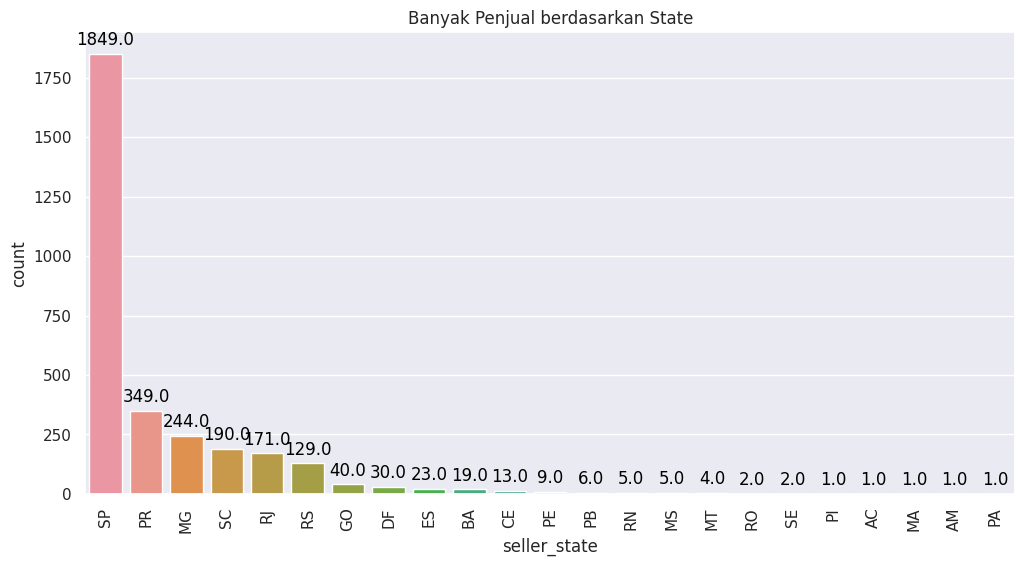

In [40]:
# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=seller_df,
                   x='seller_state',
                   order=seller_df['seller_state'].value_counts().index)
ax.set(title='Banyak Penjual berdasarkan State')

# Add text labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

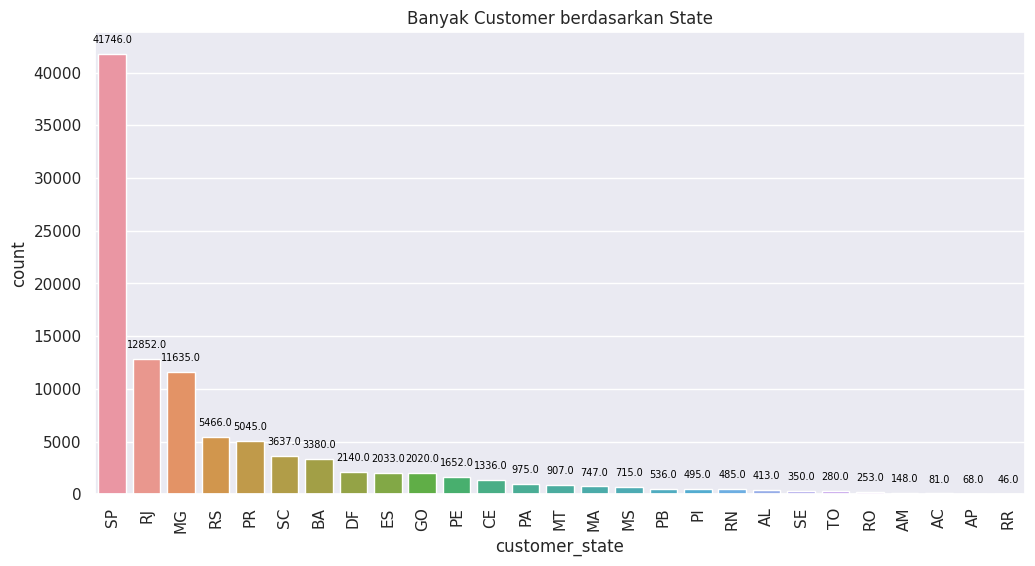

In [41]:
# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=cust_df,
                   x='customer_state',
                   order=cust_df['customer_state'].value_counts().index)
ax.set(title='Banyak Customer berdasarkan State')

# Add text labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=7, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

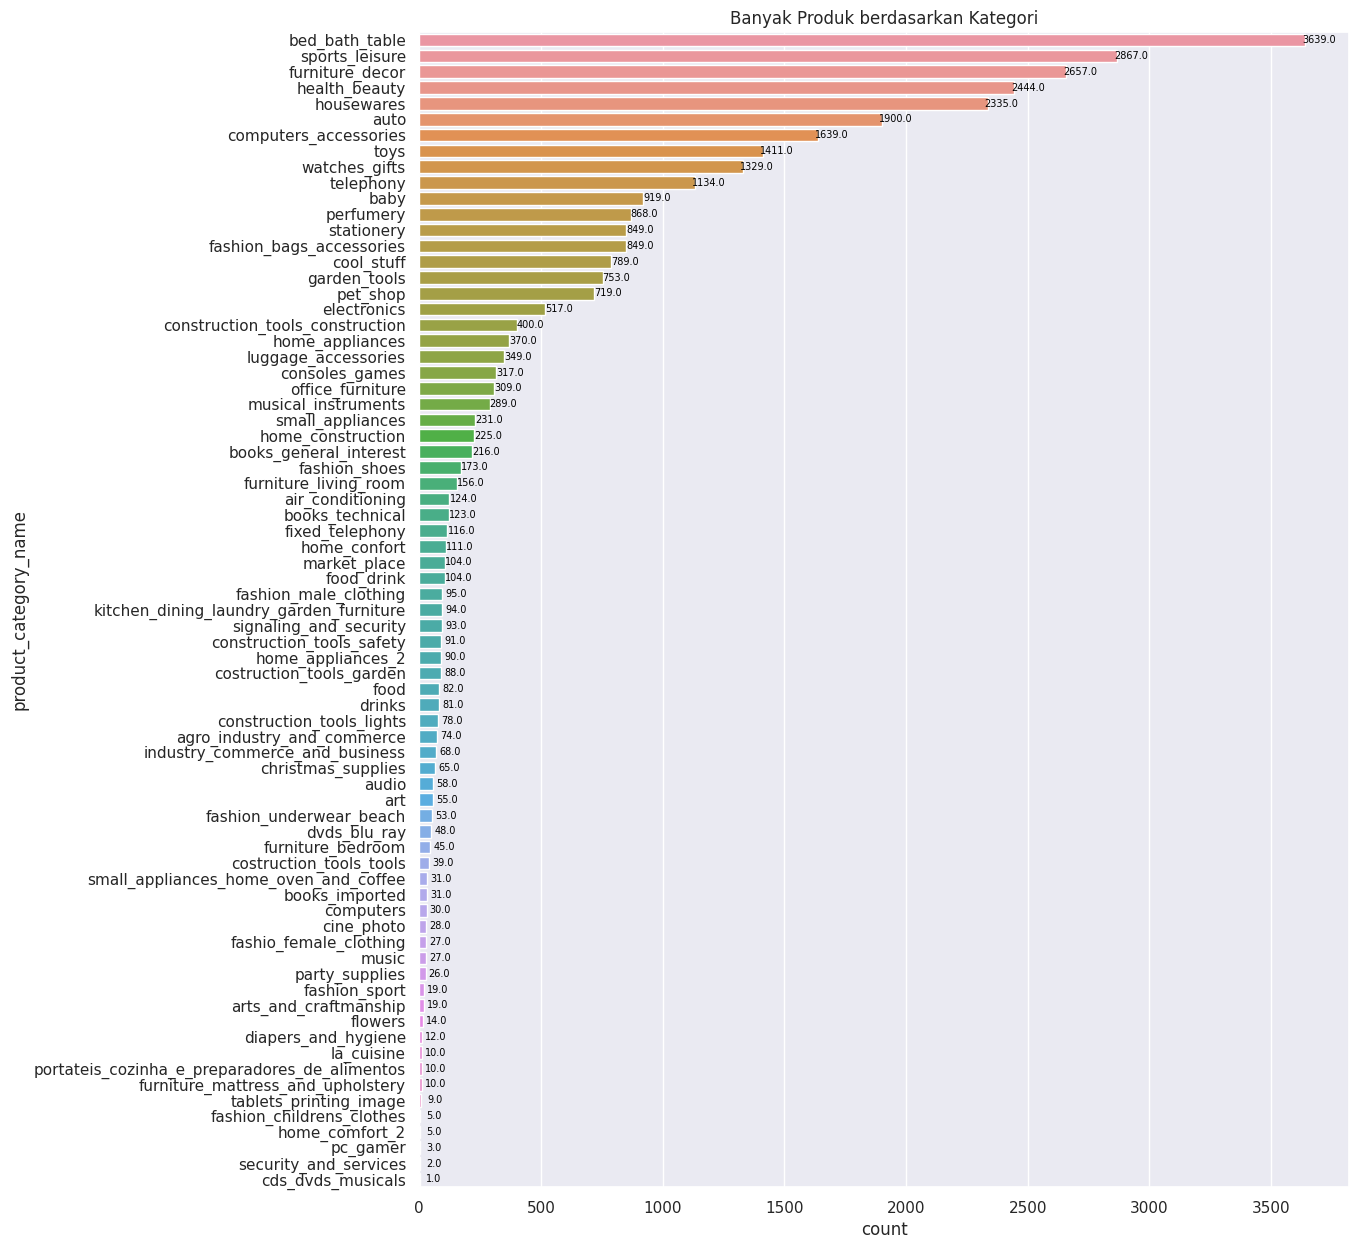

In [42]:
# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 15))
ax = sns.countplot(data=prod_df,
                   y='product_category_name',
                   order=prod_df['product_category_name'].value_counts().index)
ax.set(title='Banyak Produk berdasarkan Kategori')

# Add text labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width(), p.get_y() + p.get_height() / 2.),
                ha='center', va='center', fontsize=7, color='black', xytext=(10, 0),
                textcoords='offset points')

plt.xticks(rotation=0) 
plt.show()

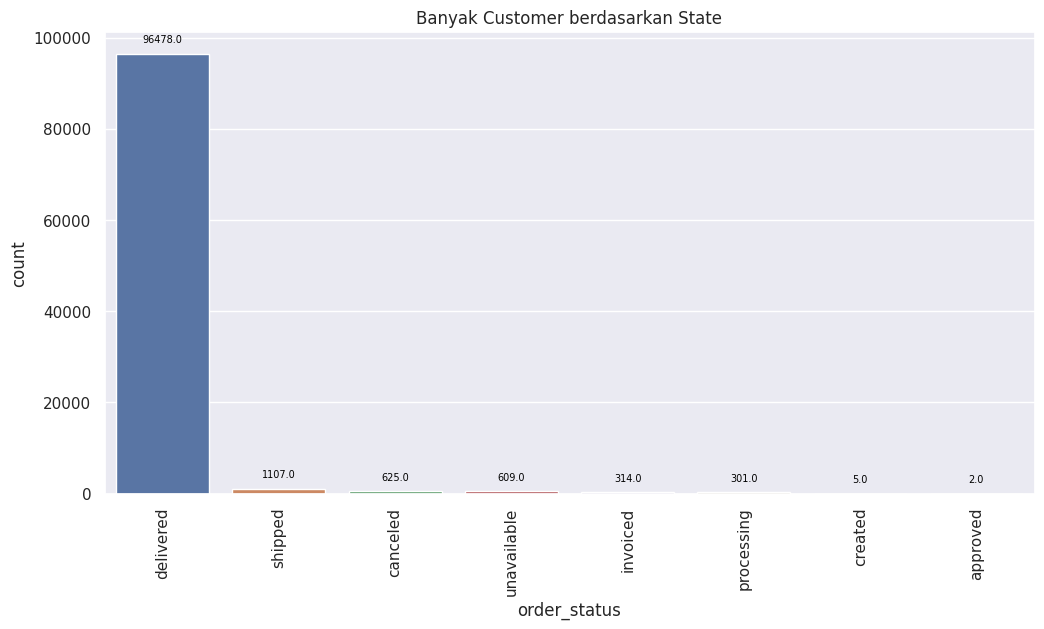

In [43]:
# Create the countplot
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=order_df,
                   x='order_status',
                   order=order_df['order_status'].value_counts().index)
ax.set(title='Banyak Customer berdasarkan State')

# Add text labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=7, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.xticks(rotation=90)  # Rotate x-axis labels if needed
plt.show()

<Axes: xlabel='Mean_Review_Score', ylabel='Count'>

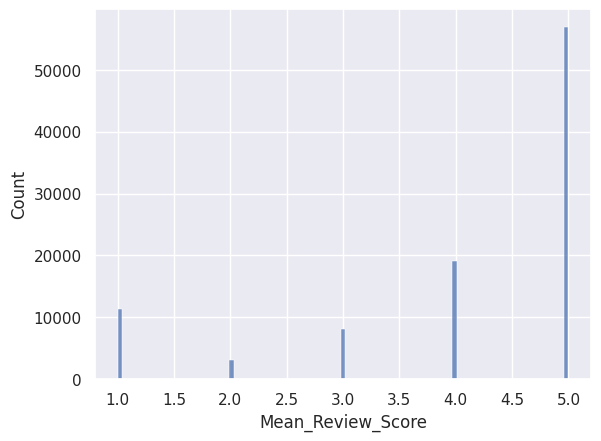

In [44]:
order_review_df_ana = order_review_df.copy()
order_review_df_ana = order_review_df_ana[['review_id','order_id','review_score']]
order_review_df_ana = order_review_df_ana.groupby(['order_id']).agg({'review_score':'mean'})
order_review_df_ana = order_review_df_ana.sort_values('review_score')
order_review_df_ana.columns = ['Mean_Review_Score']

sns.histplot(order_review_df_ana,x='Mean_Review_Score')

In [45]:
order_pay_df[order_pay_df.duplicated(subset='order_id')]

order_id              payment_sequential payment_type  \
1456    683bf306149bb869980b68d48a1bd6ab           1          credit_card   
2324    e6a66a8350bb88497954d37688ab123e           2              voucher   
2393    8e5148bee82a7e42c5f9ba76161dc51a           1          credit_card   
2414    816ccd9d21435796e8ffa9802b2a782f           1          credit_card   
2497    2cbcb371aee438c59b722a21d83597e0           2              voucher   
...                                  ...                 ...          ...   
103778  fd86c80924b4be8fb7f58c4ecc680dae           1          credit_card   
103817  6d4616de4341417e17978fe57aec1c46           1          credit_card   
103860  31bc09fdbd701a7a4f9b55b5955b8687           6              voucher   
103869  c9b01bef18eb84888f0fd071b8413b38           1          credit_card   
103874  d41f1036712e18ee525939d08b7a1c98           1          credit_card   

        payment_installments  payment_value  
1456              1                8.58      
2324              1               10.51      
2393              1                0.67      
2414              1                5.65      
2497              1                7.80      
...                      ...            ...  
103778            1               76.10      
103817            1               19.18      
103860            1               77.99      
103869            6              238.16      
103874            1                3.57      

[4446 rows x 5 columns]

## Visualization & Explanatory Analysis

### Apa Kategori Produk yang paling laku terjual ?


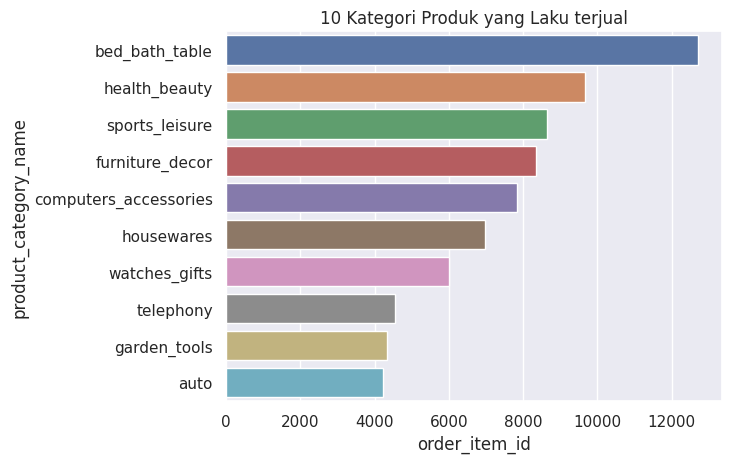

In [46]:
axs = sns.barplot(data=total_order_product[:10],x='order_item_id',y='product_category_name')
axs.set(title='10 Kategori Produk yang Laku terjual')
plt.show()

### Customer Terbanyak Orderannya berasal dari daerah mana ?

In [47]:
peta_brazil = requests.get('https://raw.githubusercontent.com/codeforgermany/click_that_hood/c920849a080627b584e139556ac009a509e73998/public/data/brazil-states.geojson').json()

m = folium.Map(location=[-15, -45], 
               zoom_start=4)

cp = folium.Choropleth(
    geo_data=peta_brazil,
    name="choropleth",
    data=cust_ord_state_df,
    columns=["customer_state", "order_id"],
    key_on="properties.sigla",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Count Order By state",
    use_jenks=True,
    highlight=True,
).add_to(m)

cust_ord_state_df_indexed = cust_ord_state_df.set_index('customer_state')
for s in cp.geojson.data['features']:
    ccc = int(cust_ord_state_df_indexed.loc[s['properties']['sigla'],'order_id'])
    s['properties']['n_order'] = ccc
# cp.geojson.data['features'][0]
folium.GeoJsonTooltip(['name', 'n_order']).add_to(cp.geojson)
folium.LayerControl().add_to(m)
m

### Penjual Terbanyak Orderannya berasal dari daerah mana ?

In [48]:
m = folium.Map(location=[-15, -45], zoom_start=3)

for ind,spcd in seller_prod_cnt_df.iterrows():
    if((np.isnan(spcd.seller_lat)==False) and (np.isnan(spcd.seller_lat))==False):
        folium.Marker(
            location=[spcd.seller_lat, spcd.seller_lng],
            tooltip=spcd.product_id,
            popup=spcd.seller_state,
            #icon=folium.Icon(icon="cloud"),
        ).add_to(m)
m

## Conclusion

* Urutan 10 Paling laku Produk Kategori  
    1. Bed Bath Table
    2. Health Beauty
    3. Sports Leisure
    4. Furniture Decor
    5. Computers Accessories
    6. Housewares
    7. Watches gifts
    8. Telephony
    9. Garden Tools
    10. Auto
* Lebih Banyak Penjualan berdasarkan Customer di Bagian Rio de Janiero, San Paulo, Minas Greais
* Lebih Penjual di sekitar pantai di negara Brazil. dan biasanya ada di Rio de Janiero , San Paulo, dan Minas Greais
* Berarti persebaran Penjual dan Pembeli tepat karena banyaknya wilayah penjual dan pembeli sama.